In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
import matplotlib.pyplot as plt

sns.set()

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


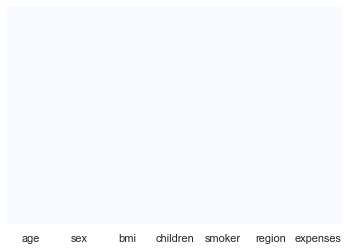

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
# Encoding categorical columns
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    res_df['sex'] = le.fit_transform(res_df['sex'])
    res_df['smoker'] = le.fit_transform(res_df['smoker'])
    res_df['region'] = le.fit_transform(res_df['region'])
    return res_df  

In [9]:
encoded_df = preprocessor(df)

In [10]:
encoded_df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [11]:
x = encoded_df.drop('expenses',axis=1).values
y = encoded_df['expenses'].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [17]:
x1 = sm.add_constant(x)

In [18]:
results = sm.OLS(y,x1).fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.2
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:43:57   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.111    -12.373      0.000   -1.37e+04   -9944.336
x1           257.2725     11.886     21.646      0.000     233.956     280.589
x2          -131.1457    332.801     -0.394      0.694    -784.017     521.726
x3           332.6448     27.720     12.000      0.000     278.265     387.025
x4           479.5646    137.640      3.484      0.001     209.549     749.580
x5          2.382e+04    411.831     57.838      0.000     2.3e+04    2.46e+04
x6          -353.4854    151.919     -2.327      0.020    -651.512     -55.458
==============================================================================
Omnibus:                      299.133   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.457
Skew:                           1.207   Prob(JB):                    7.20e-156
Kurtosis:                       5.643   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# sns.pairplot(encoded_df)

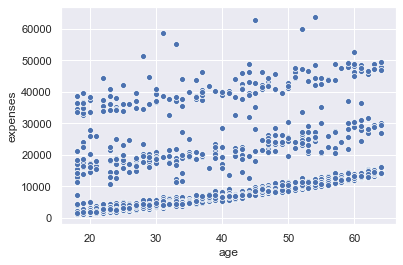

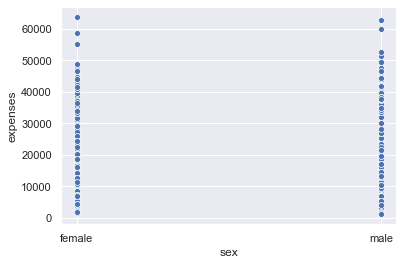

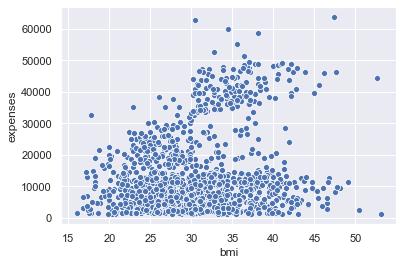

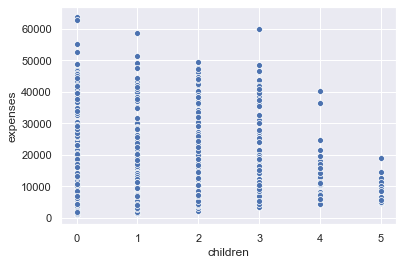

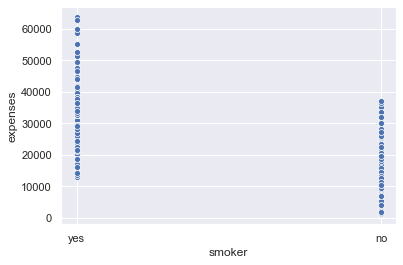

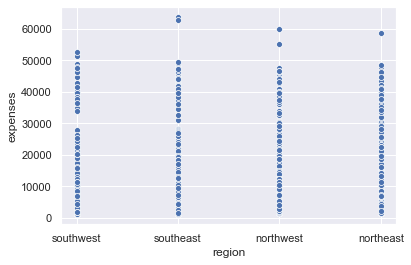

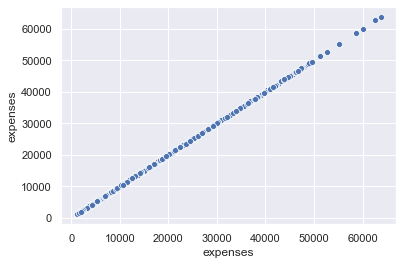

In [25]:
for i in df.columns:
    sns.scatterplot(df[i],df['expenses'])
    plt.show()

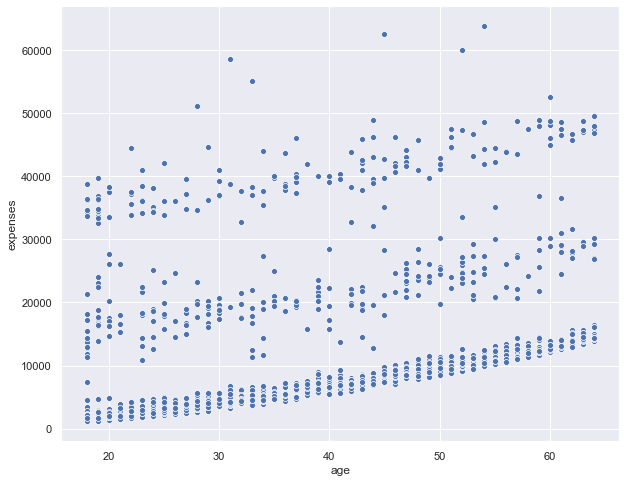

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.age, df.expenses)

C:\Users\Demoser\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


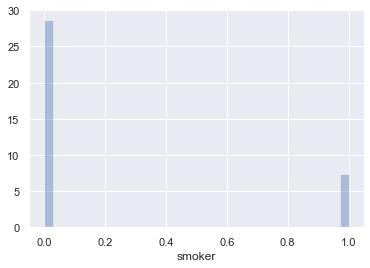

In [12]:
sns.distplot(df.smoker.map({'yes':1,'no':0}))
plt.show()

In [35]:
sm_y = df.loc[df.smoker == 'yes' ]
print(sm_y.shape)
sm_n = df.loc[df.smoker == 'no' ]
print(sm_n.shape)

(274, 7)
(1064, 7)


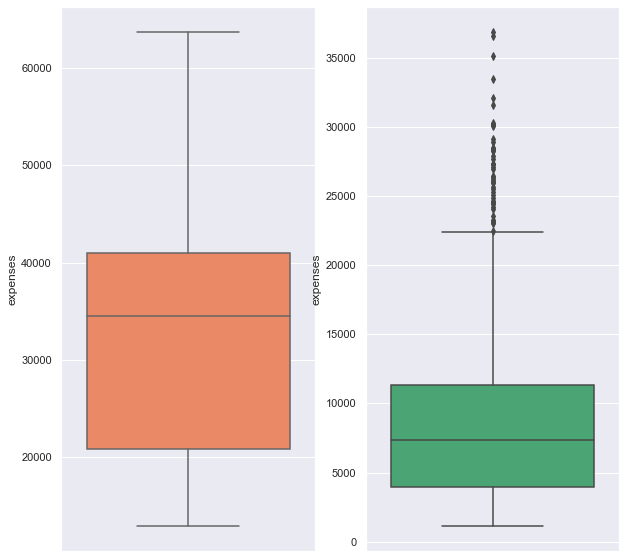

In [50]:
fig,axes = plt.subplots(nrows=1, ncols= 2, figsize = (10,10))

sns.boxplot(data = sm_y, y= "expenses", ax = axes[0],orient="v",color="coral")
sns.boxplot(data = sm_n, y= "expenses", ax = axes[1],orient="v", color="mediumseagreen")
plt.show()

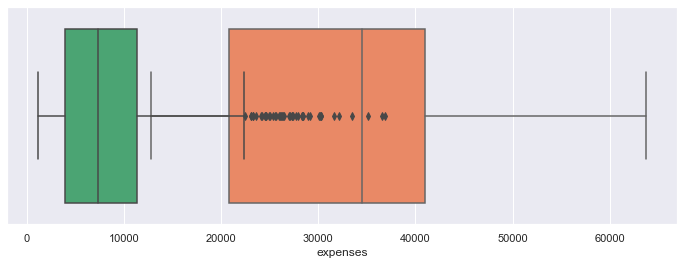

In [60]:
plt.figure(figsize=(12,4))
sns.boxplot(data = sm_y, y= "expenses",color="coral",orient="h")
sns.boxplot(data = sm_n, y= "expenses", color="mediumseagreen",orient="h")
plt.show()

In [39]:
print("Mean expense for smokers: ", sm_y.expenses.mean())
print("Mean expense for non smokers: ",sm_n.expenses.mean())

Mean expense for smokers:  32050.231970802935
Mean expense for non smokers:  8434.268449248122


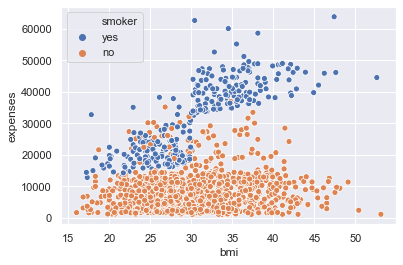

In [46]:
sns.scatterplot(df.bmi,df.expenses,hue=df.smoker)